In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data 
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")


## 1) Who will win the match MI vs RCB?

In [3]:
# get all matches between mi vs rcb
rcb_mi = matches[((matches.team1=='Royal Challengers Bangalore')&(matches.team2=='Mumbai Indians'))|((matches.team2=='Royal Challengers Bangalore')&(matches.team1=='Mumbai Indians'))]

print(f"Total number of matches between mi vs rcb : {rcb_mi.shape[0]}")

Total number of matches between mi vs rcb : 25


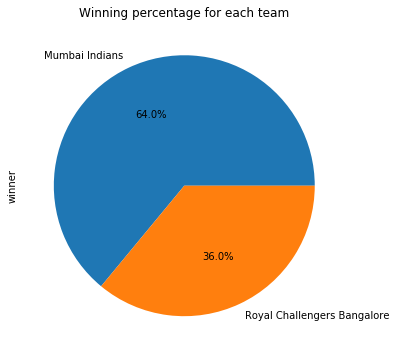

In [4]:
# calculating total wins by each team
rcb_mi.winner.value_counts().plot("pie", autopct = "%1.1f%%", figsize=(20,6))
plt.title("Winning percentage for each team")
plt.show()

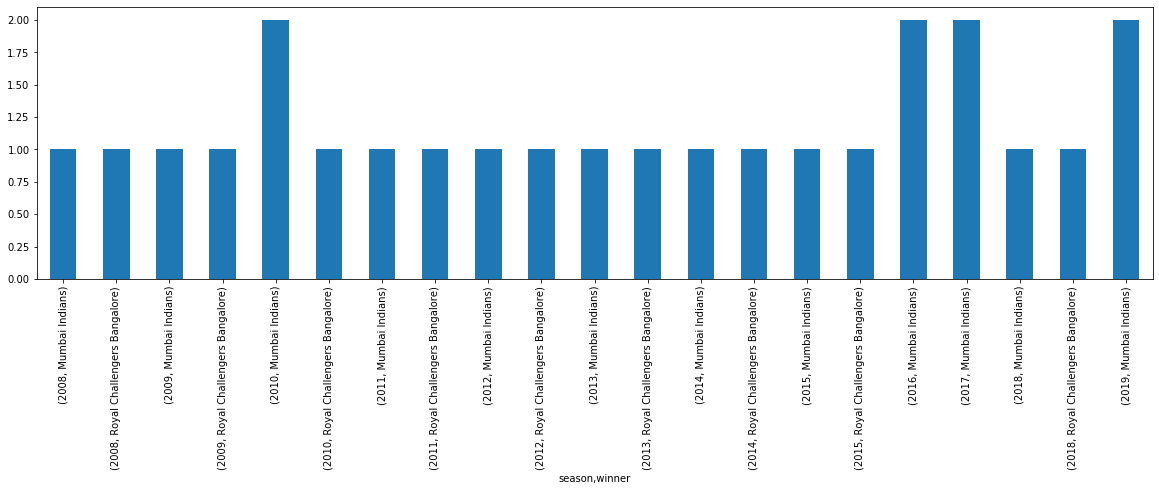

In [5]:
#checking winning percent per season
df_rcb_mi = pd.DataFrame(rcb_mi.groupby('season')['winner'].value_counts())
df_rcb_mi['winner'].plot(kind='bar', figsize=(20,5))

**Inference:**
    From the historic data by calculating number of wins by each team when playing against each other, MI has a higher probability to win.

## 2) How many bowlers in the match, from both teams, will get 2 or more wickets? If no bowler takes 2 or more wickets, we will consider the answer to be  the first option?

In [12]:
#getting all rows between mi and rcb
rcb_mi_all = deliveries[((deliveries.batting_team=='Royal Challengers Bangalore')&(deliveries.bowling_team=='Mumbai Indians'))|((deliveries.batting_team=='Mumbai Indians')&(deliveries.bowling_team=='Royal Challengers Bangalore'))]



In [30]:
#get all wickets between rcb and mi
rcb_mi_wickets = rcb_mi_all[rcb_mi_all.player_dismissed.notnull()]

#count wickets taken by each bowler in each match
rcb_mi_wickets_bowler = rcb_mi_wickets.groupby(['match_id', 'bowler'])['player_dismissed'].count()

#get only those rows where wickets taken by bowlers are 2 or more
rcb_mi_wickets_bowler_2ormore = rcb_mi_wickets_bowler[rcb_mi_wickets_bowler>=2]

#counting total players who took 2 or more wickets per batch from both teams included
rcb_mi_2ormore_wicket_count = rcb_mi_wickets_bowler_2ormore.groupby(level=0).count()

rcb_mi_2ormore_wicket_count.describe()

count    25.00000
mean      3.08000
std       1.15181
min       1.00000
25%       3.00000
50%       3.00000
75%       4.00000
max       5.00000
Name: player_dismissed, dtype: float64

match_id  bowling_team               
12        Royal Challengers Bangalore    1
37        Mumbai Indians                 1
          Royal Challengers Bangalore    1
63        Royal Challengers Bangalore    1
90        Mumbai Indians                 2
143       Royal Challengers Bangalore    1
153       Mumbai Indians                 1
188       Royal Challengers Bangalore    2
226       Mumbai Indians                 1
231       Mumbai Indians                 1
          Royal Challengers Bangalore    1
306       Royal Challengers Bangalore    1
383       Mumbai Indians                 1
          Royal Challengers Bangalore    1
417       Mumbai Indians                 1
          Royal Challengers Bangalore    1
462       Royal Challengers Bangalore    1
534       Mumbai Indians                 1
          Royal Challengers Bangalore    1
590       Mumbai Indians                 1
          Royal Challengers Bangalore    1
7907      Royal Challengers Bangalore    1
7924      Mumbai

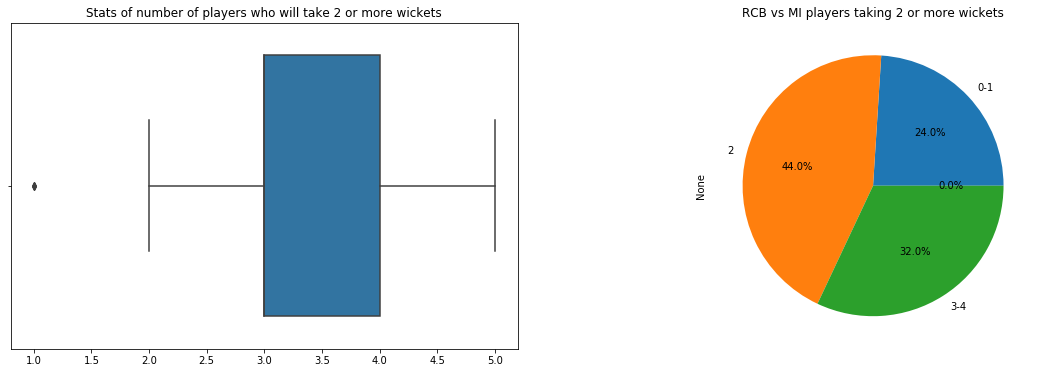

In [44]:
#checking as per options visually
fig, ax= plt.subplots(1,2, figsize=(20,6))

ax[0].set_title('Stats of number of players who will take 2 or more wickets')
sns.boxplot(rcb_mi_2ormore_wicket_count.values, ax=ax[0])

pd.cut(rcb_mi_2ormore_wicket_count.values, bins=[0,2, 3, 5, 20], labels=['0-1', '2', '3-4', '5 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='RCB vs MI players taking 2 or more wickets', ax=ax[1]);

**Inference:**
    We can see historic data indicates that there is a very high probability of 2 players as such however we can also count 3-4 such players could also be possible from both teams included.
    
    By counting wickets taken by each player per match and filtering only players who took 2 or more wickets. counting such players from both teams included per match we get a good probability that it will be 2 players next highest probability is 3-4 such players./

## 3) How many bowlers in the match, from both teams, will have an economy rate of less than 8 ? Only those bowlers who bowl more than 1 over must be considered.If no bowler has economy rate of less than 8, first option will be considered.

In [77]:
#getting all rows when MI and RCB play together
rcb_mi_all

#economy rate formula = runs conceded / number of overs

#getting all runs conceded perplayer per match
rcb_mi_bowlers_runs = rcb_mi_all.groupby(['match_id', 'bowler'])['total_runs'].sum().reset_index()

#getting all overs played by bowlers per match
rcb_mi_bowlers_overs = rcb_mi_all.groupby(['match_id', 'bowler'])['over'].nunique().reset_index()

#merging the two df two calculate the economy rate
rcb_mi_bowlers_stats = rcb_mi_bowlers_overs.merge(rcb_mi_bowlers_runs, on=['match_id', 'bowler'])
rcb_mi_bowlers_stats['economy_rate'] = rcb_mi_bowlers_stats['total_runs']/rcb_mi_bowlers_stats['over']

#filtering bowlers who bowled atleast 1 over per match and economy rate < 8
rcb_mi_bowlers_econrate_less8 = rcb_mi_bowlers_stats[(rcb_mi_bowlers_stats.over>1)& (rcb_mi_bowlers_stats.economy_rate<8)]

#counting such bowlers per match
rcb_mi_bowlers_econrate_less8_count = rcb_mi_bowlers_econrate_less8.groupby('match_id')['bowler'].count()

rcb_mi_bowlers_econrate_less8_count.describe()

count    25.00
mean      4.84
std       1.70
min       2.00
25%       3.00
50%       5.00
75%       6.00
max       7.00
Name: bowler, dtype: float64

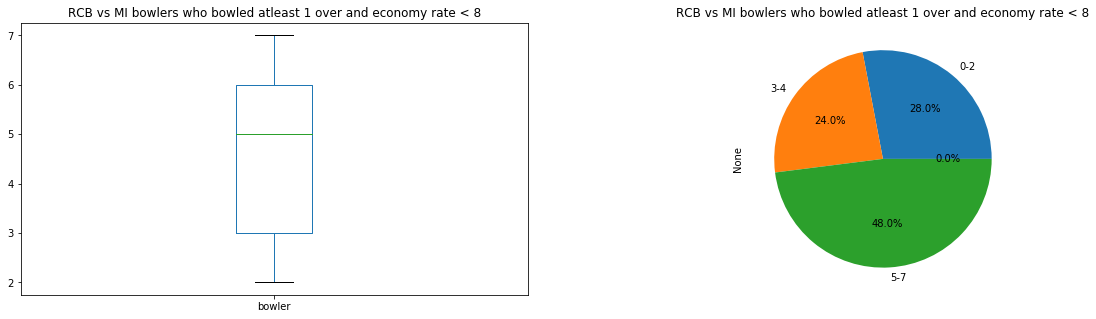

In [78]:
#checking visually
fig, ax=plt.subplots(1,2)

#checking stats plot
rcb_mi_bowlers_econrate_less8_count.plot(kind='box', title="RCB vs MI bowlers who bowled atleast 1 over and economy rate < 8", ax=ax[0])

#checking as per options
pd.cut(rcb_mi_bowlers_econrate_less8_count.values, bins=[0,3, 5, 8, 20], labels=['0-2', '3-4', '5-7', '8 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='RCB vs MI bowlers who bowled atleast 1 over and economy rate < 8', figsize=(20,5), ax=ax[1]);

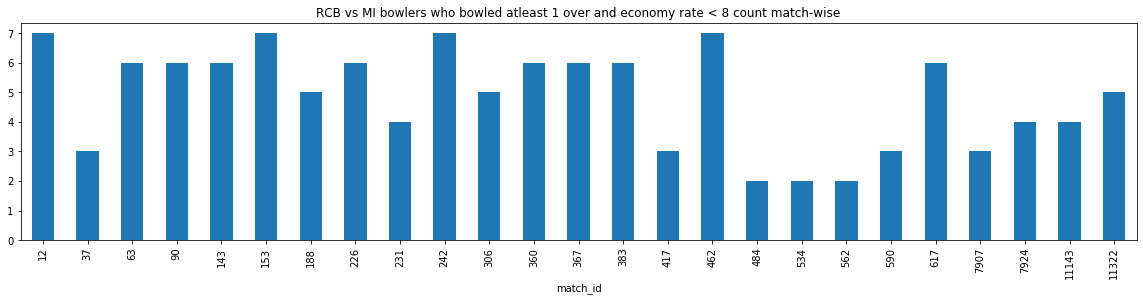

In [80]:
rcb_mi_bowlers_econrate_less8_count.plot(kind='bar', title='RCB vs MI bowlers who bowled atleast 1 over and economy rate < 8 count match-wise', figsize=(20,4))

**Inference:**
    - Calculated economy rate of each bowler from both teams and filtered bowler who gave more than 1 over. counted such players per match took average and probability as per options. The stats indicate 5-7 is a safe option for such players from both teams.
   

### 4) How many batsmen in the match, from both the teams, will have a strike rate more than 130 and hit more than 3 boundaries? Only those batsman who play more than 10 balls will be considered. If no batsman has a strike rate above 130 (or) has SR above 120 but hasnt hit more than 3 boundaries (or) hasnt played more than 10 balls, then the first option will be considered.

In [94]:
#calculating strike rate for each batsman
#gettin total balls played
rcb_mi_balls = rcb_mi_all.groupby(['match_id','batsman'])['ball'].count().reset_index()

#getting total runse scored per match by each batsman
rcb_mi_scores = rcb_mi_all.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index()

rcb_mi_sr = rcb_mi_balls.merge(rcb_mi_scores, on=['match_id', 'batsman'])

rcb_mi_sr['strike_rate'] = np.round((rcb_mi_sr ['batsman_runs']/rcb_mi_sr ['ball'])*100,2)

#counting boundaries per player
rcb_mi_boundaries = rcb_mi_all[rcb_mi_all.batsman_runs.isin([4,6])]

rcb_mi_boundaries_players = rcb_mi_boundaries.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index()
rcb_mi_boundaries_players.rename(columns={'batsman_runs':'total_boundaries'})

#merigin strike rate with boun
player_strikerates =   rcb_mi_sr.merge(rcb_mi_boundaries_players, on=['match_id', 'batsman'])

#get only players who play more than 10 balls
df = player_strikerates[(player_strikerates.ball>10)&((player_strikerates['strike_rate']>130)|(player_strikerates['strike_rate']>120)&(player_strikerates.batsman_runs_y>3))]

df.groupby('match_id')['batsman'].count().describe()

count    25.000000
mean      4.320000
std       2.076054
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max       8.000000
Name: batsman, dtype: float64

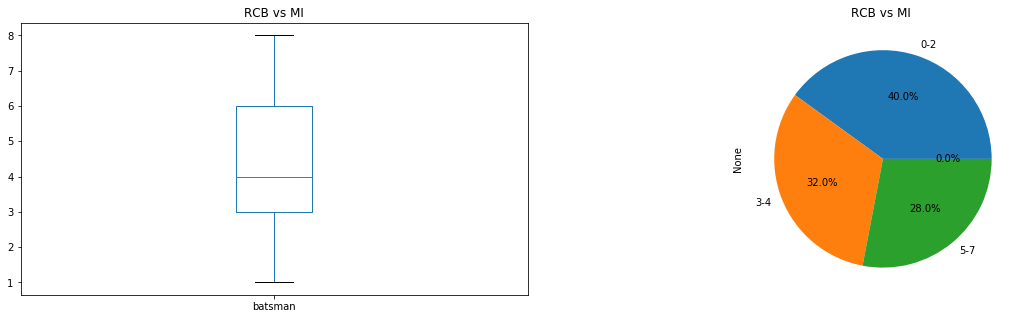

In [95]:
#checking visually
fig, ax=plt.subplots(1,2)

#checking stats plot
df.groupby('match_id')['batsman'].count().plot(kind='box', title="RCB vs MI", ax=ax[0])

#checking as per options
pd.cut(df.groupby('match_id')['batsman'].count().values, bins=[0,3, 5, 8, 20], labels=['0-2', '3-4', '5-7', '8 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='RCB vs MI ', figsize=(20,5), ax=ax[1]);

## 5) How many runs more/less will MI score in the first 6 overs as compared to RCB?

In [53]:
#getting all runs scored by rcb batting in first 6 overs
rcbb_mif_all = rcb_mi_all[(rcb_mi_all.batting_team=='Royal Challengers Bangalore')&(rcb_mi_all.over.isin(range(1,7)))]

#counting runs scored by rcb in first 6 overs
rcbb_mif_runs = rcbb_mif_all.groupby('match_id')['total_runs'].sum().reset_index()
rcbb_mif_runs = rcbb_mif_runs.rename(columns={'total_runs':'runs_scored_rcb'})

#getting all runs scored by mi batting in first 6 overs
mib_rcbf_all = rcb_mi_all[(rcb_mi_all.batting_team=='Mumbai Indians')&(rcb_mi_all.over.isin(range(1,7)))]

#counting runs scored by mi in first 6 overs
mib_rcbf_runs = mib_rcbf_all.groupby('match_id')['total_runs'].sum().reset_index()
mib_rcbf_runs = mib_rcbf_runs.rename(columns={'total_runs':'runs_scored_mi'})

In [54]:
rcb_mi_total_o1_6 = rcbb_mif_runs.merge(mib_rcbf_runs, on='match_id')
rcb_mi_total_o1_6['difference'] = np.abs(rcb_mi_total_o1_6['runs_scored_rcb']- rcb_mi_total_o1_6['runs_scored_mi'])

#basic statistics
rcb_mi_total_o1_6.difference.describe()

count    25.000000
mean     10.920000
std       6.670332
min       0.000000
25%       7.000000
50%      10.000000
75%      16.000000
max      26.000000
Name: difference, dtype: float64

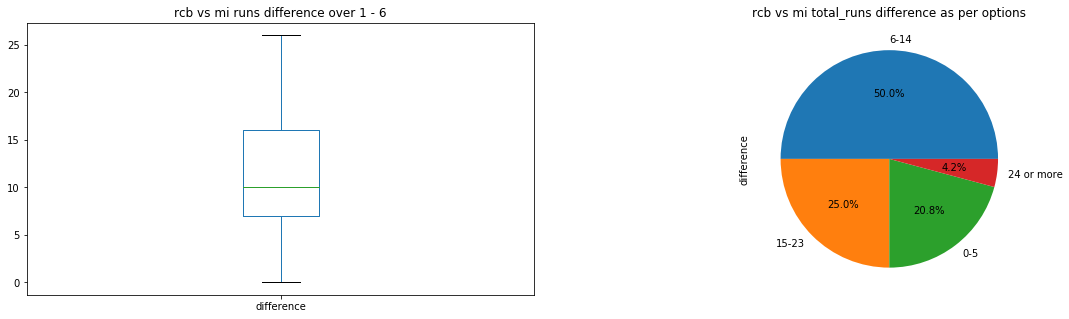

In [55]:
#checking visually
fig, ax=plt.subplots(1,2)

#checking stats plot
rcb_mi_total_o1_6.difference.plot(kind='box', title="rcb vs mi runs difference over 1 - 6", ax=ax[0])

#checking as per options
pd.cut(rcb_mi_total_o1_6.difference, bins=[0,6, 15, 24, 40], labels=['0-5', '6-14', '15-23', '24 or more']).value_counts().plot("pie", autopct='%1.1f%%', title='rcb vs mi total_runs difference as per options', figsize=(20,5), ax=ax[1]);

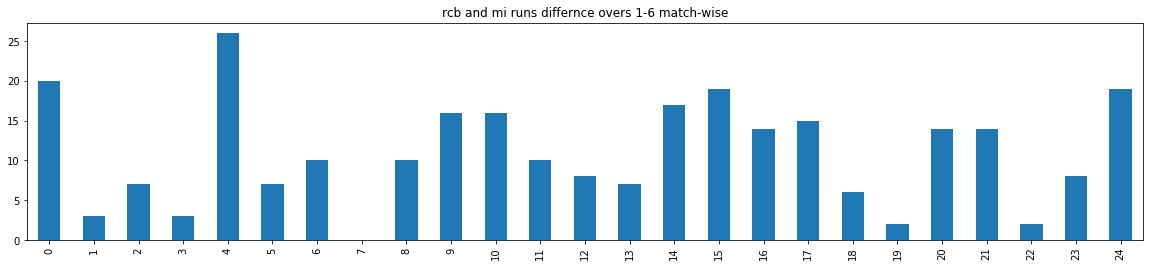

In [56]:
rcb_mi_total_o1_6.difference.plot(kind='bar', title='rcb and mi runs differnce overs 1-6 match-wise', figsize=(20,4))

**Inference:**
    calculated total runs scored by RCB and MI in overs 1-6 then took a differnce of their runs per match, if we see the highest probability indicates the difference will be 6-14 runs.